<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_7_Addressing_vanishing_issue_in_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

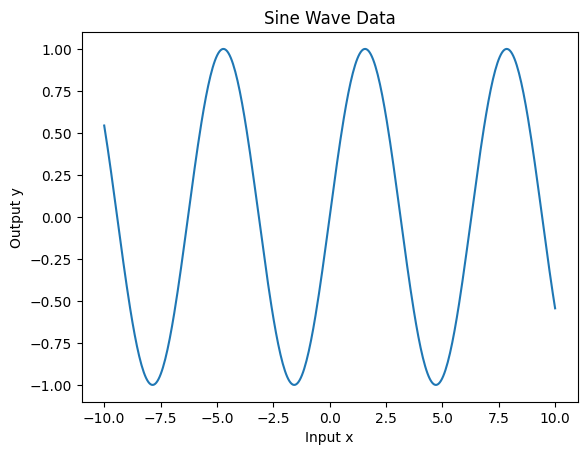

In [2]:
# Sample dataset
x = torch.linspace(-10,10,steps = 400).reshape(-1,1)
y = torch.sin(x)

# Plot
plt.plot(x.numpy(), y.numpy())
plt.title('Sine Wave Data')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.show()

In [3]:
# Create a Simple Nueral Network Model
class DeepNeuralNetwork(nn.Module):
    def __init__(self,layers):
        super(DeepNeuralNetwork,self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
           self.layers.append(nn.Linear(layers[i],layers[i+1]))

    def forward(self,x):
       for i in range(len(self.layers) - 1):
          x = torch.sigmoid(self.layers[i](x))

       return self.layers[-1](x)

In [4]:
# Train the neural network

# Model, Loss and Optimizer
model = DeepNeuralNetwork([1, 10, 10, 10, 10, 10, 1])
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.MSELoss()

# Training function
def train(model,criterion,optimizer,x,y,epochs):
  losses = []
  for epoch in range(epochs):

     # Clear gradients from the previous iteration
    optimizer.zero_grad()

    # Compute the output of the model given input x
    output = model(x)

    # Compute the loss between the predicted output and the actual labels
    loss = criterion(output,y)

    # Backpropagation: compute gradients of the loss with respect to model parameters
    loss.backward()

    # Update model parameters using the computed gradients
    optimizer.step()

    # Append the current loss value to the list of losses
    losses.append(loss.item())

    if epoch % 50 == 0:
      for i, param in enumerate(model.parameters()):
                print(f'Layer {i+1} gradient norm: {param.grad.norm().item()}')
  return losses

Layer 1 gradient norm: 2.543086520745419e-05
Layer 2 gradient norm: 5.0823946367017925e-06
Layer 3 gradient norm: 9.044541366165504e-05
Layer 4 gradient norm: 5.773268640041351e-05
Layer 5 gradient norm: 0.0009191068238578737
Layer 6 gradient norm: 0.0005940732662566006
Layer 7 gradient norm: 0.00774364173412323
Layer 8 gradient norm: 0.0049494910053908825
Layer 9 gradient norm: 0.061576854437589645
Layer 10 gradient norm: 0.0382191501557827
Layer 11 gradient norm: 0.40406614542007446
Layer 12 gradient norm: 0.2854700982570648
Layer 1 gradient norm: 2.0665367628680542e-05
Layer 2 gradient norm: 1.3053535212748102e-06
Layer 3 gradient norm: 3.978841778007336e-05
Layer 4 gradient norm: 2.025453795795329e-06
Layer 5 gradient norm: 6.122823106124997e-05
Layer 6 gradient norm: 2.2850616005598567e-05
Layer 7 gradient norm: 0.00030896294629201293
Layer 8 gradient norm: 0.00018786189320962876
Layer 9 gradient norm: 0.002552569843828678
Layer 10 gradient norm: 0.0015471181832253933
Layer 11 gra

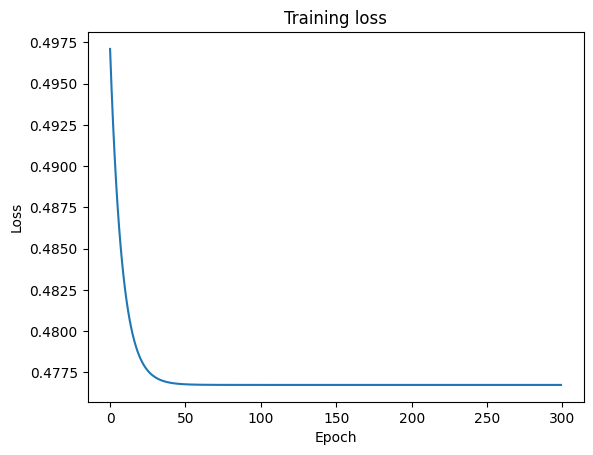

In [5]:
losses = train(model,criterion,optimizer,x,y,300)

plt.plot(losses)
plt.title('Training loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

# Add Batch Normalization

In [13]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self,layers):
        super(DeepNeuralNetwork,self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
           self.layers.append(nn.Linear(layers[i],layers[i+1]))
           self.layers.append(nn.BatchNorm1d(layers[i + 1]))

    def forward(self,x):
       for i in range(len(self.layers) - 1):
          x = torch.sigmoid(self.layers[i](x))

       return self.layers[-1](x)

In [17]:
model = DeepNeuralNetwork([1, 10, 10, 10, 10, 10, 1])
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.MSELoss()

def train(model,criterion,optimizer,x,y,epochs):
   losses = []
   for epoch in range(epochs):
      optimizer.zero_grad()

      output = model(x)

      loss = criterion(output,y)

      loss.backward()

      optimizer.step()

      losses.append(loss.item())

      if epoch % 50 == 0:
          for i, param in enumerate(model.parameters()):
                    print(f'Layer {i+1} gradient norm: {param.grad.norm().item()}')
   return losses

Layer 1 gradient norm: 0.7565323710441589
Layer 2 gradient norm: 0.2126886248588562
Layer 3 gradient norm: 0.45201924443244934
Layer 4 gradient norm: 0.12484508752822876
Layer 5 gradient norm: 3.2127959728240967
Layer 6 gradient norm: 0.018416479229927063
Layer 7 gradient norm: 0.4087221324443817
Layer 8 gradient norm: 0.11370555311441422
Layer 9 gradient norm: 2.377347707748413
Layer 10 gradient norm: 0.03279758244752884
Layer 11 gradient norm: 0.5237468481063843
Layer 12 gradient norm: 0.27617284655570984
Layer 13 gradient norm: 3.781776189804077
Layer 14 gradient norm: 0.006576607935130596
Layer 15 gradient norm: 0.21598166227340698
Layer 16 gradient norm: 0.10887295752763748
Layer 17 gradient norm: 1.5371627807617188
Layer 18 gradient norm: 0.003230320056900382
Layer 19 gradient norm: 0.12337765842676163
Layer 20 gradient norm: 0.029589179903268814
Layer 21 gradient norm: 0.8885340094566345
Layer 22 gradient norm: 0.013706352561712265
Layer 23 gradient norm: 2.202718734741211
Layer

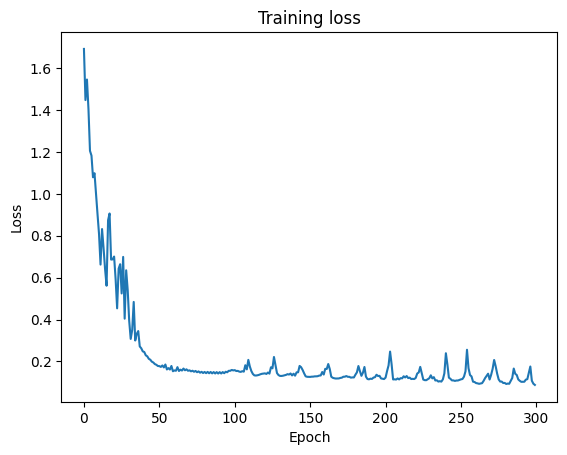

In [18]:
losses = train(model,criterion,optimizer,x,y,300)

plt.plot(losses)
plt.title('Training loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

# Adam Optimizer

In [31]:
class DeepNeuralNetwork(nn.Module):
  def __init__(self,layers):
    super(DeepNeuralNetwork,self).__init__()
    self.layers = nn.ModuleList()
    for i in range(len(layers) - 1):
      self.layers.append(nn.Linear(layers[i],layers[i + 1]))

  def forward(self,x):
    for i in range(len(self.layers) - 1):
      x = torch.sigmoid(self.layers[i](x))

    return self.layers[-1](x)

In [32]:
# Train the neural network

# Model, Loss and Optimizer
model = DeepNeuralNetwork([1, 10, 10, 10, 10, 10, 1])
optimizer = optim.Adam(model.parameters(),lr = 0.01)
criterion = nn.MSELoss()

# Training function
def train(model,criterion,optimizer,x,y,epochs):
  losses = []

  for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(x)

    loss = criterion(output,y)

    loss.backward()

    optimizer.step()

    losses.append(loss.item())

    if epoch % 50 == 0:
       for i, param in enumerate(model.parameters()):
              print(f'Layer {i+1} gradient norm: {param.grad.norm().item()}')
  return losses

Layer 1 gradient norm: 2.1868583644391038e-05
Layer 2 gradient norm: 1.046787656378001e-05
Layer 3 gradient norm: 0.0002803899405989796
Layer 4 gradient norm: 0.0001415443985024467
Layer 5 gradient norm: 0.002382270758971572
Layer 6 gradient norm: 0.0014071782352402806
Layer 7 gradient norm: 0.013547406531870365
Layer 8 gradient norm: 0.009533103555440903
Layer 9 gradient norm: 0.09858579933643341
Layer 10 gradient norm: 0.05924134701490402
Layer 11 gradient norm: 0.5531932711601257
Layer 12 gradient norm: 0.3484926223754883
Layer 1 gradient norm: 0.0002902344858739525
Layer 2 gradient norm: 9.645904356148094e-05
Layer 3 gradient norm: 0.00040541469934396446
Layer 4 gradient norm: 0.00025028889649547637
Layer 5 gradient norm: 0.0008858073852024972
Layer 6 gradient norm: 0.0003556114970706403
Layer 7 gradient norm: 0.002355928299948573
Layer 8 gradient norm: 0.0003472714452072978
Layer 9 gradient norm: 0.00520594185218215
Layer 10 gradient norm: 0.0020586915779858828
Layer 11 gradient n

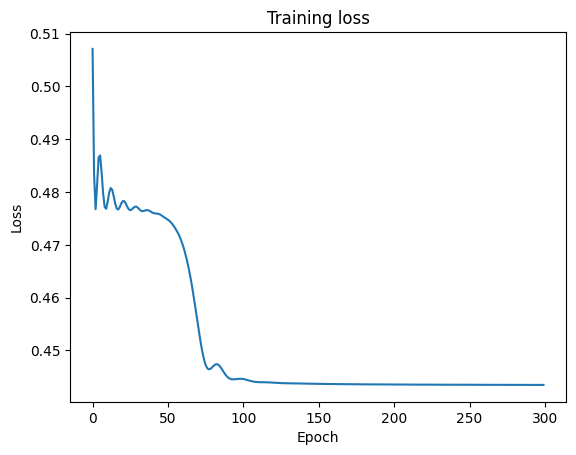

In [33]:
losses = train(model,criterion,optimizer,x,y,300)

plt.plot(losses)
plt.title('Training loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

# Relu Activation function

In [35]:
class DeepNeuralNetwork(nn.Module):
  def __init__(self,layers):
    super(DeepNeuralNetwork,self).__init__()
    self.layers = nn.ModuleList()
    for i in range(len(layers) - 1):
      self.layers.append(nn.Linear(layers[i],layers[i+1]))

  def forward(self,x):
    for i in range(len(self.layers) - 1):
      x = torch.relu(self.layers[i](x))

    return self.layers[-1](x)

In [38]:
model = DeepNeuralNetwork([1, 10, 10, 10, 10, 10, 1])
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.MSELoss()

def train(model,criterion,optimizer,x,y,epochs):
  losses = []
  for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(x)

    loss = criterion(output,y)

    loss.backward()

    optimizer.step()

    losses.append(loss.item())

    if epoch % 50 == 0:
      for i, param in enumerate(model.parameters()):
                print(f'Layer {i+1} gradient norm: {param.grad.norm().item()}')
  return losses

Layer 1 gradient norm: 0.0137216467410326
Layer 2 gradient norm: 0.0022545321844518185
Layer 3 gradient norm: 0.03862393647432327
Layer 4 gradient norm: 0.00371858524158597
Layer 5 gradient norm: 0.026807617396116257
Layer 6 gradient norm: 0.010261797346174717
Layer 7 gradient norm: 0.03285576403141022
Layer 8 gradient norm: 0.04839777201414108
Layer 9 gradient norm: 0.053134530782699585
Layer 10 gradient norm: 0.17992116510868073
Layer 11 gradient norm: 0.23661695420742035
Layer 12 gradient norm: 0.4663504660129547
Layer 1 gradient norm: 0.008587496355175972
Layer 2 gradient norm: 0.0012487736530601978
Layer 3 gradient norm: 0.023027293384075165
Layer 4 gradient norm: 0.002259901724755764
Layer 5 gradient norm: 0.01817484013736248
Layer 6 gradient norm: 0.0051731448620557785
Layer 7 gradient norm: 0.017871441319584846
Layer 8 gradient norm: 0.020211273804306984
Layer 9 gradient norm: 0.009135222062468529
Layer 10 gradient norm: 0.04201994836330414
Layer 11 gradient norm: 0.05745078623

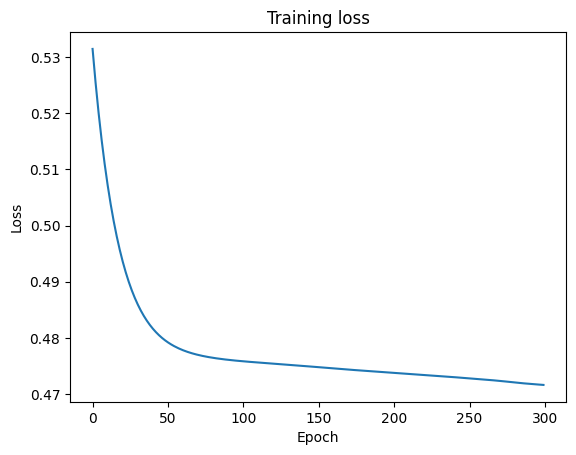

In [39]:
losses = train(model,criterion,optimizer,x,y,300)

plt.plot(losses)
plt.title('Training loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

# Combination of Adam, Relu and Batch Normalization

In [48]:
class DeepNeuralNetwork(nn.Module):
  def __init__(self,layers):
    super(DeepNeuralNetwork,self).__init__()
    self.layers = nn.ModuleList()
    for i in range(len(layers) - 1):
      self.layers.append(nn.Linear(layers[i],layers[i + 1]))
      self.layers.append(nn.BatchNorm1d(layers[i + 1]))

  def forward(self,x):
    for i in range(len(self.layers) - 1):
      x = torch.relu(self.layers[i](x))

    return self.layers[-1](x)

In [49]:
model = DeepNeuralNetwork([1, 10, 10, 10, 10, 10, 1])
optimizer = optim.Adam(model.parameters(),lr = 0.01)
criterion = nn.MSELoss()

def train(model,criterion,optimizer,x,y,epochs):
  losses = []
  for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(x)

    loss = criterion(output,y)

    loss.backward()

    optimizer.step()

    losses.append(loss.item())

    if epoch % 50 == 0:
      for i, param in enumerate(model.parameters()):
              print(f'Layer {i+1} gradient norm: {param.grad.norm().item()}')
  return losses


Layer 1 gradient norm: 0.574548065662384
Layer 2 gradient norm: 0.17034082114696503
Layer 3 gradient norm: 0.6354407668113708
Layer 4 gradient norm: 0.4321930706501007
Layer 5 gradient norm: 7.7254767417907715
Layer 6 gradient norm: 2.666193962097168
Layer 7 gradient norm: 0.6063138842582703
Layer 8 gradient norm: 0.5068227052688599
Layer 9 gradient norm: 2.870089292526245
Layer 10 gradient norm: 1.0312762260437012
Layer 11 gradient norm: 0.8146378397941589
Layer 12 gradient norm: 0.46394580602645874
Layer 13 gradient norm: 4.362146854400635
Layer 14 gradient norm: 1.3261607885360718
Layer 15 gradient norm: 0.20661519467830658
Layer 16 gradient norm: 0.1604541540145874
Layer 17 gradient norm: 1.551053762435913
Layer 18 gradient norm: 0.1667414903640747
Layer 19 gradient norm: 0.36891844868659973
Layer 20 gradient norm: 0.19901004433631897
Layer 21 gradient norm: 1.672131896018982
Layer 22 gradient norm: 0.15433871746063232
Layer 23 gradient norm: 2.377711534500122
Layer 24 gradient nor

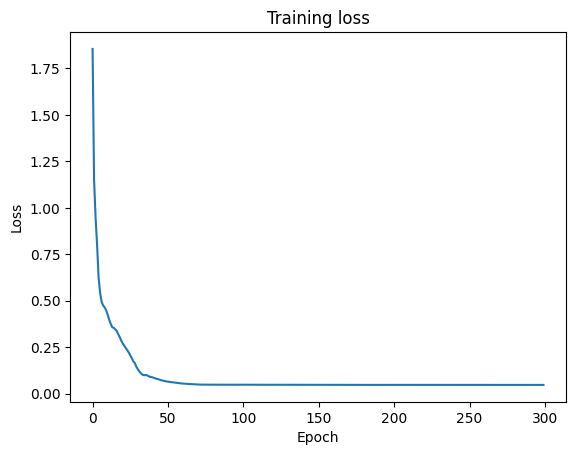

In [50]:
losses = train(model,criterion,optimizer,x,y,300)

plt.plot(losses)
plt.title('Training loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()